### 0. 引入依赖

In [5]:
import numpy as np
import matplotlib.pyplot as plt
points = np.genfromtxt('data.csv', delimiter=',')

### 1.导入数据

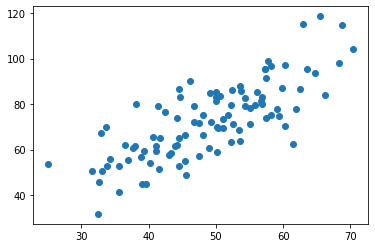

In [6]:
points = np.genfromtxt('data.csv', delimiter=',') #delimiter分割符

# 提取points中的数据 作为(x,y)
x = points[:,0]
y = points[:,1]

# 用plt画出散点图
plt.scatter(x, y)
plt.show()

### 2.定义损失函数

In [7]:
# 损失函数是 系数的函数，还需要传入数据points     
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points)
    
    # 逐点计算损失误差，然后求平均数
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - w*x - b) ** 2
    
    return total_cost / M

### 3.定义模型的超参数

In [8]:
alpha = 0.0001 # 步长，经验值
# 起点
initial_w = 0 
initial_b = 0 
num_iter = 10  # 迭代次数

### 4.定义核心梯度下降算法函数

In [33]:
def step_grad_desc(current_w, current_b, alpha, points):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    # 对每个点代入公式求和
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_grad_w += (current_w * x + current_b - y) * x
        sum_grad_b += current_w * x + current_b - y
    
    # 用公式求当前梯度
    grad_w = sum_grad_w / M * 2
    grad_b = sum_grad_b / M * 2 
    
    # 梯度下降，更新当前的w,b
    updated_w = current_w - alpha * grad_w
    updated_b = current_b - alpha * grad_b 
    return [updated_w, updated_b]

def grad_desc(points, init_w, init_b, alpha, num_iter):
    w = init_w
    b = init_b
    M = len(points)
    
    cost_list = []
    for i in range(num_iter):
        cost_list.append( compute_cost(w, b, points))
        w, b = step_grad_desc(w, b, alpha, points)
    
    return [w, b, cost_list]

### 5.测试 计算w和b

w is: {}  1.4774173755483797
b is: {}  0.02963934787473238
cost is: {} 112.65585181499748


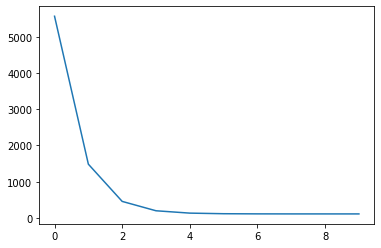

In [36]:
w, b, cost_list = grad_desc(points, initial_w, initial_b, alpha, num_iter)

print("w is: {} ",w)
print("b is: {} ",b)
cost = compute_cost(w, b, points)
print("cost is: {}",cost)
plt.plot(cost_list) # 默认下标索引为x，值为y
plt.show()

### 6.画出曲线

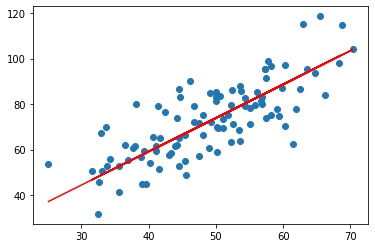

In [37]:
plt.scatter(x, y)
# 针对x 计算出 预测的y值
# numpy可以这样写 x是一组，得到的predict_y也是一组值
predict_y = x * w + b

plt.plot(x, predict_y, c='r') # 点图 c代表颜色
plt.show()

### 使用sklean代码实现线性回归

In [41]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
X = x.reshape(-1,1)
model = lm.fit(X, y)
print("w is: {} ", model.coef_)
print("b is: {} ", model.intercept_)
cost = compute_cost(model.coef_, model.intercept_, points)
print("cost is: {}",cost)

w is: {}  [1.32243102]
b is: {}  7.991020982270399
cost is: {} [110.25738347]


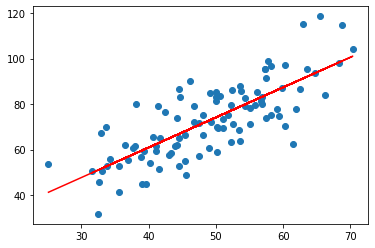

In [43]:
plt.scatter(x, y)
predict_y = x * model.coef_ + model.intercept_

plt.plot(x, predict_y, c='r') 
plt.show()